In [1]:
# 2.1 Data Loading

import numpy as np
from keras.datasets import mnist

# Loading MNIST data using Keras API
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Splitting training data: 80% training, 20% validation
split_index = int(0.8 * len(x_train_full))
x_train, x_val = x_train_full[:split_index], x_train_full[split_index:]
y_train, y_val = y_train_full[:split_index], y_train_full[split_index:]

# Verifying the shapes
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set shape: (48000, 28, 28)
Validation set shape: (12000, 28, 28)
Test set shape: (10000, 28, 28)


Class Distribution: {0: 4729, 1: 5470, 2: 4762, 3: 4889, 4: 4655, 5: 4324, 6: 4748, 7: 4968, 8: 4653, 9: 4802}


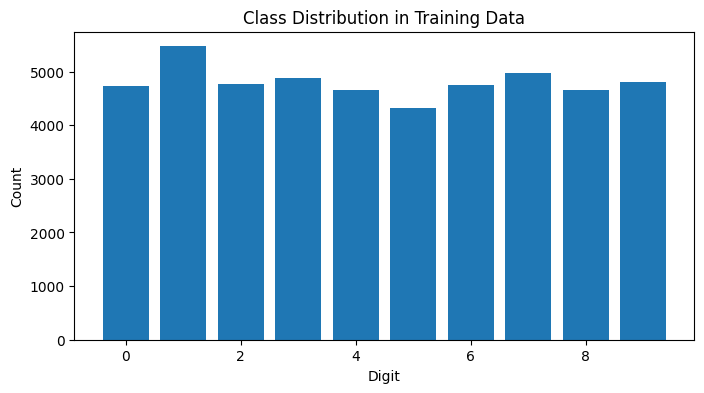

Mean pixel value: 33.371813483205784
Standard Deviation of pixel values: 78.64125520707765


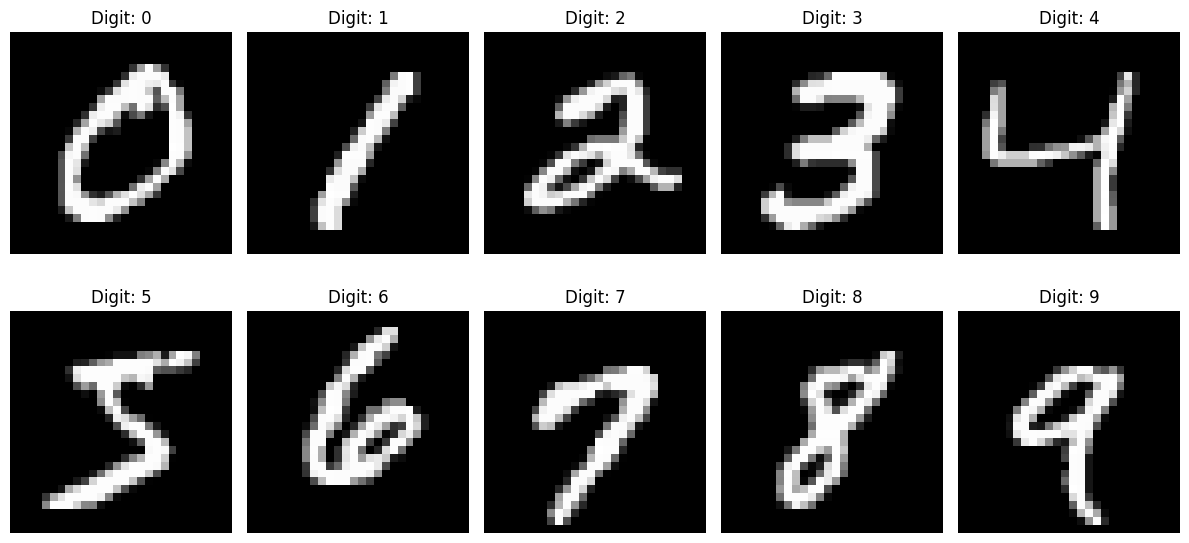

In [4]:
# 2.2 Data Analysis

import matplotlib.pyplot as plt

# Computing class distribution for training data
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

# Plotting class distribution as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(unique, counts)
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()

# Calculating basic statistics
print("Mean pixel value:", np.mean(x_train))
print("Standard Deviation of pixel values:", np.std(x_train))

# Visualizing one sample per digit
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for digit in range(10):
    index = np.where(y_train == digit)[0][0]  # First instance of each digit
    ax = axes[digit // 5, digit % 5]
    ax.imshow(x_train[index], cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# 2.3 Data Preprocessing

# Normalizing the images by scaling pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val   = x_val.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Verifying that the shapes remain unchanged after normalization
print("Training set shape (normalized):", x_train.shape)
print("Validation set shape (normalized):", x_val.shape)
print("Test set shape (normalized):", x_test.shape)


Training set shape (normalized): (48000, 28, 28)
Validation set shape (normalized): (12000, 28, 28)
Test set shape (normalized): (10000, 28, 28)


k = 1, Validation Accuracy: 0.9682
k = 3, Validation Accuracy: 0.9704
k = 5, Validation Accuracy: 0.9688
k = 7, Validation Accuracy: 0.9679
k = 9, Validation Accuracy: 0.9682


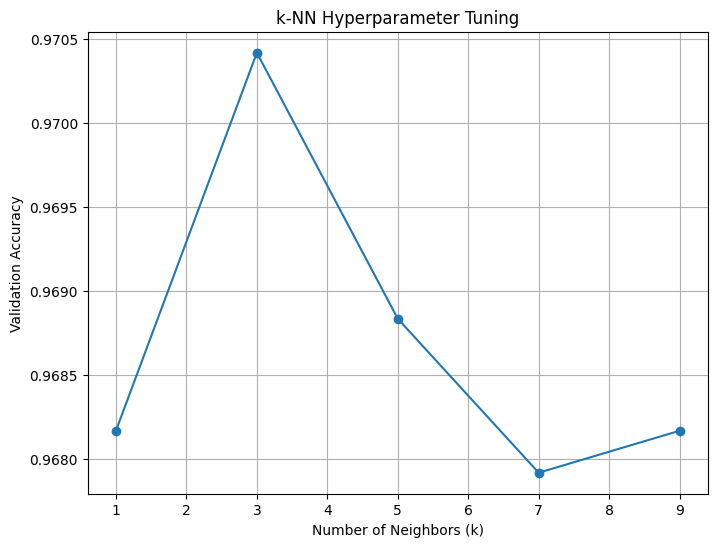

In [8]:
# 3.1 Model Initialization and Hyperparameter Tuning

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Since scikit-learn's k-NN classifier expects a 2D array for each sample,
# we need to flatten the 28x28 images for training and validation.
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat   = x_val.reshape(x_val.shape[0], -1)

# Defining the neighbor values to try
neighbors = [1, 3, 5, 7, 9]
val_accuracies = []

# Looping over each neighbor value and evaluate on the validation set
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)
    y_val_pred = knn.predict(x_val_flat)
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(accuracy)
    print(f"k = {k}, Validation Accuracy: {accuracy:.4f}")

# Plotting the validation accuracy vs. number of neighbors
plt.figure(figsize=(8, 6))
plt.plot(neighbors, val_accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('k-NN Hyperparameter Tuning')
plt.grid(True)
plt.show()


Optimal number of neighbors (k): 3
Test Accuracy: 0.9705
Test Precision: 0.9707
Test Recall: 0.9705
Test F1 Score: 0.9705

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



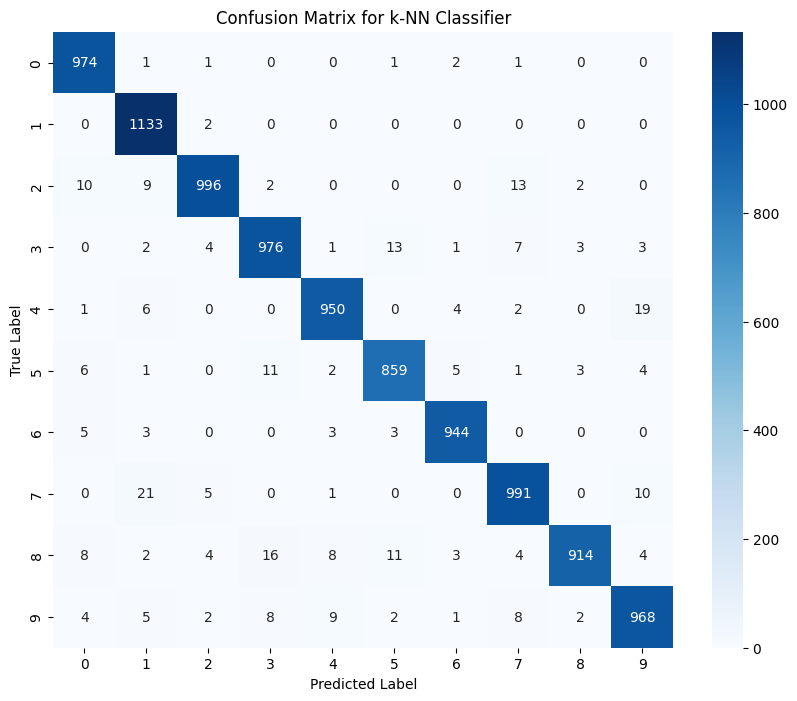

Digit 0: 6 misclassifications, 0.61% misclassification rate
Digit 1: 2 misclassifications, 0.18% misclassification rate
Digit 2: 36 misclassifications, 3.49% misclassification rate
Digit 3: 34 misclassifications, 3.37% misclassification rate
Digit 4: 32 misclassifications, 3.26% misclassification rate
Digit 5: 33 misclassifications, 3.70% misclassification rate
Digit 6: 14 misclassifications, 1.46% misclassification rate
Digit 7: 37 misclassifications, 3.60% misclassification rate
Digit 8: 60 misclassifications, 6.16% misclassification rate
Digit 9: 41 misclassifications, 4.06% misclassification rate

Top 3 Most Frequently Misclassified Digits:
Digit 8: 60 misclassifications, Rate: 6.16%
Digit 9: 41 misclassifications, Rate: 4.06%
Digit 7: 37 misclassifications, Rate: 3.60%


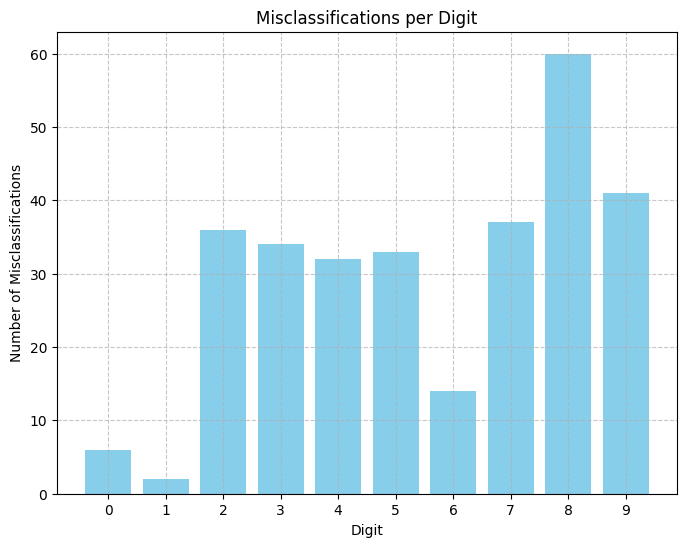

Total misclassified examples: 295


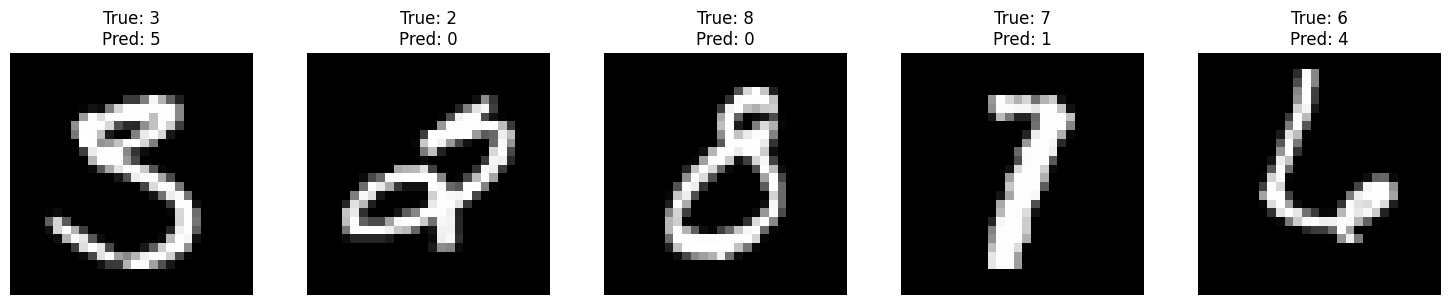

In [10]:
# 3.2 Final Model Training and Evaluation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Determining the best k
best_k_index = np.argmax(val_accuracies)
best_k = neighbors[best_k_index]
print(f"Optimal number of neighbors (k): {best_k}")

# Combining the training and validation sets
x_train_val = np.concatenate((x_train, x_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# For k-NN, flattening the images
x_train_val_flat = x_train_val.reshape(x_train_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Retraining the k-NN classifier using the combined training set
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train_val_flat, y_train_val)

# Evaluating the final model on the test set
y_test_pred = final_knn.predict(x_test_flat)

# Computing evaluation metrics
test_accuracy  = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall    = recall_score(y_test, y_test_pred, average='weighted')
test_f1        = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Alternatively, view a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Generating and visualizing a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for k-NN Classifier")
plt.show()

# For each digit, computing the number of misclassifications
misclassifications = cm.sum(axis=1) - np.diag(cm)
digits = np.arange(len(misclassifications))

# Displaying misclassifications and misclassification rate for each digit
true_counts = cm.sum(axis=1)
misclassification_rate = misclassifications / true_counts
for digit, miscls, rate in zip(digits, misclassifications, misclassification_rate):
    print(f"Digit {digit}: {miscls} misclassifications, {rate:.2%} misclassification rate")

# Identifying the top 3 digits with the most misclassifications
sorted_indices = np.argsort(misclassifications)[::-1]
top3 = sorted_indices[:3]
print("\nTop 3 Most Frequently Misclassified Digits:")
for digit in top3:
    print(f"Digit {digit}: {misclassifications[digit]} misclassifications, Rate: {misclassification_rate[digit]:.2%}")

# Plotting misclassifications per digit
plt.figure(figsize=(8, 6))
plt.bar(digits, misclassifications, color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassifications per Digit')
plt.xticks(digits)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Identifying misclassified examples
misclassified_indices = np.where(y_test != y_test_pred)[0]
print(f"Total misclassified examples: {len(misclassified_indices)}")

# Selecting 5 random misclassified examples
num_examples = 5
if len(misclassified_indices) >= num_examples:
    random_indices = np.random.choice(misclassified_indices, num_examples, replace=False)
else:
    random_indices = misclassified_indices

# Plotting the misclassified examples
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
for i, idx in enumerate(random_indices):
    ax = axes[i]
    ax.imshow(x_test[idx], cmap='gray')
    ax.set_title(f"True: {y_test[idx]}\nPred: {y_test_pred[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [11]:
# 4.1 Model Training and Hyperparameter Tuning

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Flattening the training and validation sets
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat   = x_val.reshape(x_val.shape[0], -1)

# Defining the hyperparameter grid
max_depth_values = [2, 5, 10]
min_samples_split_values = [2, 5]

# Dictionary to store results for each configuration
results = {}
best_accuracy = 0
best_params = {}

# Looping over all combinations of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # Initializing the Decision Tree classifier with the current hyperparameters
        dt = DecisionTreeClassifier(max_depth=max_depth, 
                                    min_samples_split=min_samples_split,
                                    random_state=42)
        # Training the model on the training set
        dt.fit(x_train_flat, y_train)
        # Predicting on the validation set
        y_val_pred = dt.predict(x_val_flat)
        # Calculating validation accuracy
        acc = accuracy_score(y_val, y_val_pred)
        
        # Saving the result for this configuration
        results[(max_depth, min_samples_split)] = acc
        
        # Printing the configuration and its accuracy
        print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split} => Validation Accuracy: {acc:.4f}")
        
        # Updating the best hyperparameters if current model is better
        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {"max_depth": max_depth, "min_samples_split": min_samples_split}

# Displaying the best-performing hyperparameter configuration
print("\nBest Hyperparameters:")
print(f"Max Depth: {best_params['max_depth']}, Min Samples Split: {best_params['min_samples_split']}, Accuracy: {best_accuracy:.4f}")

Max Depth: 2, Min Samples Split: 2 => Validation Accuracy: 0.1872
Max Depth: 2, Min Samples Split: 5 => Validation Accuracy: 0.1872
Max Depth: 5, Min Samples Split: 2 => Validation Accuracy: 0.2855
Max Depth: 5, Min Samples Split: 5 => Validation Accuracy: 0.2855
Max Depth: 10, Min Samples Split: 2 => Validation Accuracy: 0.4176
Max Depth: 10, Min Samples Split: 5 => Validation Accuracy: 0.4177

Best Hyperparameters:
Max Depth: 10, Min Samples Split: 5, Accuracy: 0.4177


Test Accuracy:  0.3714
Test Precision: 0.6540
Test Recall:    0.3714
Test F1 Score:  0.3609

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.58      0.69       980
           1       0.16      0.99      0.28      1135
           2       0.87      0.46      0.60      1032
           3       0.73      0.03      0.07      1010
           4       0.43      0.08      0.13       982
           5       0.74      0.02      0.03       892
           6       0.94      0.77      0.85       958
           7       0.97      0.50      0.65      1028
           8       0.00      0.00      0.00       974
           9       0.90      0.17      0.29      1009

    accuracy                           0.37     10000
   macro avg       0.66      0.36      0.36     10000
weighted avg       0.65      0.37      0.36     10000



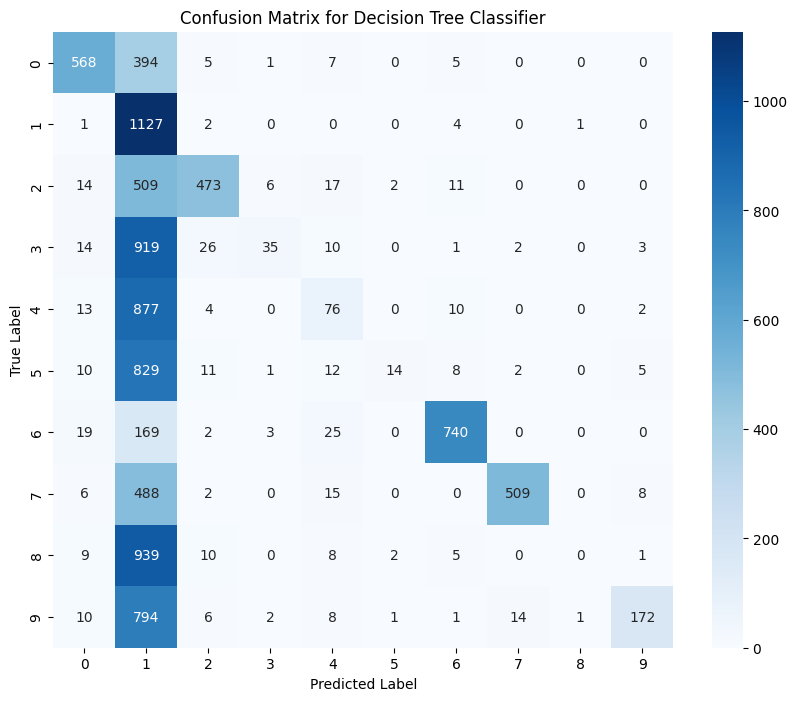

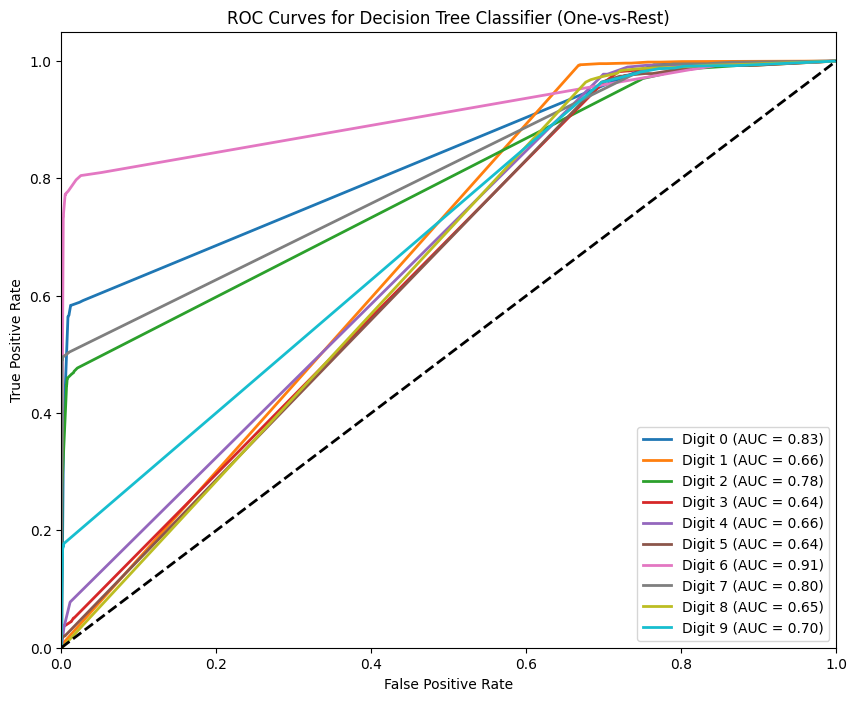

In [12]:
# 4.2 Evaluation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_curve, auc)
from sklearn.preprocessing import label_binarize

# 1. Final Model Training

# Combining training and validation sets
x_train_val = np.concatenate((x_train, x_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Flattening images
x_train_val_flat = x_train_val.reshape(x_train_val.shape[0], -1)
x_test_flat      = x_test.reshape(x_test.shape[0], -1)

# Initializing and training the final Decision Tree with best hyperparameters
final_dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
final_dt.fit(x_train_val_flat, y_train_val)

# 2. Model Evaluation on Test Set

# Predicting labels for the test set
y_test_pred = final_dt.predict(x_test_flat)

# Computing evaluation metrics
test_accuracy  = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall    = recall_score(y_test, y_test_pred, average='weighted')
test_f1        = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy:  {:.4f}".format(test_accuracy))
print("Test Precision: {:.4f}".format(test_precision))
print("Test Recall:    {:.4f}".format(test_recall))
print("Test F1 Score:  {:.4f}".format(test_f1))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred))

# 3. Confusion Matrix and Analysis

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# 4. ROC Curves and AUC for Each Digit

# Computing predicted probabilities for each class
y_score = final_dt.predict_proba(x_test_flat)

# Binarizing the test labels for multi-class ROC analysis
n_classes = 10
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Computing ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves for all digits on a single plot
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Digit {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Decision Tree Classifier (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()
